In [4]:
print(3)

3


image.shape (1, 3, 3, 1)
weight.shpae (2, 2, 1, 1)
conv2d img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


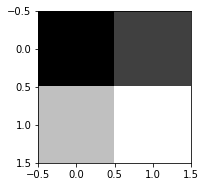

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]], dtype=np.float32)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shpae", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')


# sess = tf.InteractiveSession()
# image = np.array([[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]])
# print(image.shape)
# plt.imshow(image.reshape(3,3), cmap="Greys")

In [3]:
import numpy as np
np.repeat(np.array([1,2]),2)

array([1, 1, 2, 2])

In [4]:
np.array([[1,2]]) + np.array([[1],[2]])

array([[2, 3],
       [3, 4]])

In [74]:
def get_im2col_indices(x_shape, field_height, field_width, padding=1, stride=1):
    # First figure out what the size of the output should be
    N, C, H, W = x_shape
    assert (H + 2 * padding - field_height) % stride == 0
    assert (W + 2 * padding - field_height) % stride == 0
    out_height = (H + 2 * padding - field_height) / stride + 1
    out_width = (W + 2 * padding - field_width) / stride + 1
    
    i0 = np.repeat(np.arange(field_height), field_width)
    i0 = np.tile(i0, C)
    i1 = stride * np.repeat(np.arange(out_height), out_width)
    
    j0 = np.tile(np.arange(field_width), field_height*C)
    j1 = stride * np.tile(np.arange(out_width), out_height)
    i = i0.reshape(1,-1) + i1.reshape(-1,1)
    j = j0.reshape(1,-1) + j1.reshape(-1,1)
    k = np.tile(np.repeat(np.arange(C), field_width*field_height), out_width*out_height)
    
    

In [75]:
x = np.arange(120).reshape(2,3,4,5)

In [76]:
N, C, H, W = x.shape
padding = 0
stride = 1
field_height = 3
field_width = 3
assert (H + 2 * padding - field_height) % stride == 0
assert (W + 2 * padding - field_height) % stride == 0
out_height = (H + 2 * padding - field_height) // stride + 1
out_width = (W + 2 * padding - field_width) // stride + 1
i0 = np.repeat(np.arange(field_height), field_width)
i0 = np.tile(i0, C)
i1 = stride * np.repeat(np.arange(out_height), out_width)

j0 = np.tile(np.arange(field_width), field_height*C)
j1 = stride * np.tile(np.arange(out_width), out_height)
i = i0.reshape(1,-1) + i1.reshape(-1,1)
j = j0.reshape(1,-1) + j1.reshape(-1,1)
k = np.repeat(np.arange(C), field_width*field_height)

In [79]:
print(x)
cols = x[:,k,i,j]
print('-'*10)
cols.transpose(1,2,0).reshape(field_height*field_width*C, -1)

[[[[  0   1   2   3   4]
   [  5   6   7   8   9]
   [ 10  11  12  13  14]
   [ 15  16  17  18  19]]

  [[ 20  21  22  23  24]
   [ 25  26  27  28  29]
   [ 30  31  32  33  34]
   [ 35  36  37  38  39]]

  [[ 40  41  42  43  44]
   [ 45  46  47  48  49]
   [ 50  51  52  53  54]
   [ 55  56  57  58  59]]]


 [[[ 60  61  62  63  64]
   [ 65  66  67  68  69]
   [ 70  71  72  73  74]
   [ 75  76  77  78  79]]

  [[ 80  81  82  83  84]
   [ 85  86  87  88  89]
   [ 90  91  92  93  94]
   [ 95  96  97  98  99]]

  [[100 101 102 103 104]
   [105 106 107 108 109]
   [110 111 112 113 114]
   [115 116 117 118 119]]]]
----------


array([[  0,  60,   1,  61,   2,  62,   5,  65,   6,  66,   7,  67],
       [ 10,  70,  11,  71,  12,  72,  20,  80,  21,  81,  22,  82],
       [ 25,  85,  26,  86,  27,  87,  30,  90,  31,  91,  32,  92],
       [ 40, 100,  41, 101,  42, 102,  45, 105,  46, 106,  47, 107],
       [ 50, 110,  51, 111,  52, 112,   1,  61,   2,  62,   3,  63],
       [  6,  66,   7,  67,   8,  68,  11,  71,  12,  72,  13,  73],
       [ 21,  81,  22,  82,  23,  83,  26,  86,  27,  87,  28,  88],
       [ 31,  91,  32,  92,  33,  93,  41, 101,  42, 102,  43, 103],
       [ 46, 106,  47, 107,  48, 108,  51, 111,  52, 112,  53, 113],
       [  2,  62,   3,  63,   4,  64,   7,  67,   8,  68,   9,  69],
       [ 12,  72,  13,  73,  14,  74,  22,  82,  23,  83,  24,  84],
       [ 27,  87,  28,  88,  29,  89,  32,  92,  33,  93,  34,  94],
       [ 42, 102,  43, 103,  44, 104,  47, 107,  48, 108,  49, 109],
       [ 52, 112,  53, 113,  54, 114,   5,  65,   6,  66,   7,  67],
       [ 10,  70,  11,  71,  12,  

In [29]:
x[]

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
[[0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2]
 [1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3 1 1 1 2 2 2 3 3 3]]
[[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
 [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
 [0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2]
 [1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]]


In [49]:
np.dot(np.array([1,2,3,4])*np.array([1,2]).reshape(2,1))

TypeError: Required argument 'b' (pos 2) not found